In [ ]:
from scipy.stats import zscore

# Calculate the z-scores of the 'Avg Tweets per Week' column
df_grouped['Z-Score'] = zscore(df_grouped['Avg Tweets per Week'])

# Remove records with a z-score greater than 3 or less than -3
df_grouped_no_outliers = df_grouped[(df_grouped['Z-Score'] > -3) & (df_grouped['Z-Score'] < 3)]

# Drop the 'Z-Score' column as it's no longer needed
df_grouped_no_outliers = df_grouped_no_outliers.drop(columns='Z-Score')

# Display the DataFrame
df_grouped_no_outliers

NameError: name 'df_grouped' is not defined

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.stats import skewnorm, zscore

# Recreate the DataFrame
data = genTweetsAll(100)
flat_data = [item for sublist in data for item in sublist]
df = pd.DataFrame(flat_data, columns=['Age', 'Date', 'Tweet Content'])

# Group the records according to age ranges (separated by 5 years)
df['Age Group'] = pd.cut(df['Age'], bins=np.arange(10, 85, 5), right=False)

# For each group, calculate the average number of tweets per week
df['Week'] = df['Date'].dt.isocalendar().week
df_grouped = df.groupby(['Age Group', 'Week']).size().reset_index(name='Tweets')
df_grouped['Age Group Mid'] = df_grouped['Age Group'].apply(lambda x: x.mid)
df_grouped = df_grouped.groupby('Age Group Mid').agg({'Tweets': 'mean'}).reset_index().rename(columns={'Tweets': 'Avg Tweets per Week'})

# Calculate the z-scores of the 'Avg Tweets per Week' column
df_grouped['Z-Score'] = zscore(df_grouped['Avg Tweets per Week'])

# Remove records with a z-score greater than 3 or less than -3
df_grouped_no_outliers = df_grouped[(df_grouped['Z-Score'] > -3) & (df_grouped['Z-Score'] < 3)]

# Drop the 'Z-Score' column as it's no longer needed
df_grouped_no_outliers = df_grouped_no_outliers.drop(columns='Z-Score')

# Display the DataFrame
df_grouped_no_outliers

NameError: name 'genTweetsAll' is not defined

In [ ]:
import random
import string
import numpy as np
import pandas as pd
from scipy.stats import skewnorm, zscore
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

# Function to generate random string
def generate_random_string(length=10):
    letters = string.ascii_lowercase
    return ''.join(random.choice(letters) for _ in range(length))

# Function to generate tweets
def generate_tweets(tweet_dates):
    tweets = []
    for date in tweet_dates:
        tweet_text = generate_random_string()
        tweets.append((date, tweet_text))
    return tweets

# Function to generate tweet dates for one user
def tweetDatesGenOne(age):
    tweetdates=[]
    rate = age_group(age)
    weeks = createWeeks()
    for week in weeks:
        num_tweets = np.random.poisson(rate)
        tweetdates += list(np.random.choice(week, size=num_tweets, replace=True))
    return tweetdates

# Function to assign tweet rate based on age group
def age_group(x):
    if 16 <= x <= 25:
        return 8
    elif 26 <= x <= 35:
        return 6
    elif 36 <= x <= 45:
        return 4
    elif 46 <= x <= 55:
        return 3
    elif 56 <= x <= 65:
        return 2
    elif 66 <= x <= 75:
        return 1
    elif x >= 76:
        return 0
    else:
        return 0

# Function to generate ages
def genAges(numberofAges):
    skewness = -5
    rand_var = skewnorm.rvs(a=skewness, loc=40, scale=10, size=numberofAges)
    return rand_var

# Function to generate tweets for all users
def genTweetsAll(howmany):
    data = []
    x = genAges(howmany)
    for y in x:
        dates = tweetDatesGenOne(y)
        tweets = generate_tweets(dates)
        tweetstriples = [(y,) + tweet for tweet in tweets]
        data.append(tweetstriples)
    return data

# Function to create weeks
def createWeeks():
    today = datetime.now()
    three_years_ago = today - relativedelta(years=3)
    days = []
    current_date = three_years_ago
    while current_date <= today:
        days.append(current_date)
        current_date += timedelta(days=1)
    weeks = []
    current_day = 0
    while current_day < len(days):
        week = days[current_day:current_day+7]
        weeks.append(week)
        current_day += 7
    return weeks

In [ ]:
# Recreate the DataFrame
data = genTweetsAll(100)
flat_data = [item for sublist in data for item in sublist]
df = pd.DataFrame(flat_data, columns=['Age', 'Date', 'Tweet Content'])

# Group the records according to age ranges (separated by 5 years)
df['Age Group'] = pd.cut(df['Age'], bins=np.arange(10, 85, 5), right=False)

# For each group, calculate the average number of tweets per week
df['Week'] = df['Date'].dt.isocalendar().week
df_grouped = df.groupby(['Age Group', 'Week']).size().reset_index(name='Tweets')
df_grouped['Age Group Mid'] = df_grouped['Age Group'].apply(lambda x: x.mid)
df_grouped = df_grouped.groupby('Age Group Mid').agg({'Tweets': 'mean'}).reset_index().rename(columns={'Tweets': 'Avg Tweets per Week'})

# Calculate the z-scores of the 'Avg Tweets per Week' column
df_grouped['Z-Score'] = zscore(df_grouped['Avg Tweets per Week'])

# Remove records with a z-score greater than 3 or less than -3
df_grouped_no_outliers = df_grouped[(df_grouped['Z-Score'] > -3) & (df_grouped['Z-Score'] < 3)]

# Drop the 'Z-Score' column as it's no longer needed
df_grouped_no_outliers = df_grouped_no_outliers.drop(columns='Z-Score')

# Display the DataFrame
df_grouped_no_outliers

In [ ]:
# Recreate the DataFrame
data = genTweetsAll(100)
flat_data = [item for sublist in data for item in sublist]
df = pd.DataFrame(flat_data, columns=['Age', 'Date', 'Tweet Content'])

# Group the records according to age ranges (separated by 5 years)
df['Age Group'] = pd.cut(df['Age'], bins=np.arange(10, 85, 5), right=False)

# For each group, calculate the average number of tweets per week
df['Week'] = df['Date'].dt.isocalendar().week
df_grouped = df.groupby(['Age Group', 'Week']).size().reset_index(name='Tweets')
df_grouped['Age Group Mid'] = df_grouped['Age Group'].apply(lambda x: x.mid)
df_grouped = df_grouped.groupby('Age Group Mid').agg({'Tweets': 'mean'}).reset_index().rename(columns={'Tweets': 'Avg Tweets per Week'})

# Calculate the z-scores of the 'Avg Tweets per Week' column
df_grouped['Z-Score'] = zscore(df_grouped['Avg Tweets per Week'])

# Remove records with a z-score greater than 3 or less than -3
df_grouped_no_outliers = df_grouped[(df_grouped['Z-Score'] > -3) & (df_grouped['Z-Score'] < 3)]

# Drop the 'Z-Score' column as it's no longer needed
df_grouped_no_outliers = df_grouped_no_outliers.drop(columns='Z-Score')

# Display the DataFrame
df_grouped_no_outliers

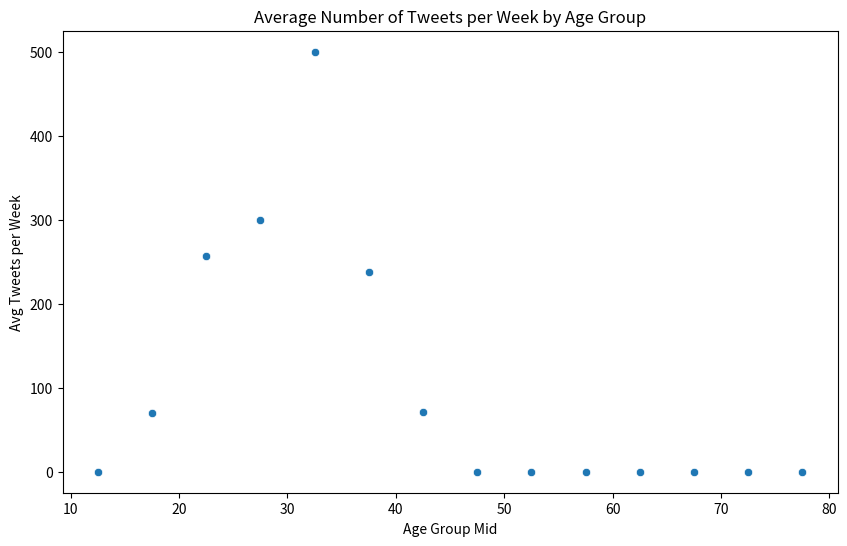

Coefficients: 
 [-5.25829173]
Mean squared error: 31466.73
Coefficient of determination: 0.00


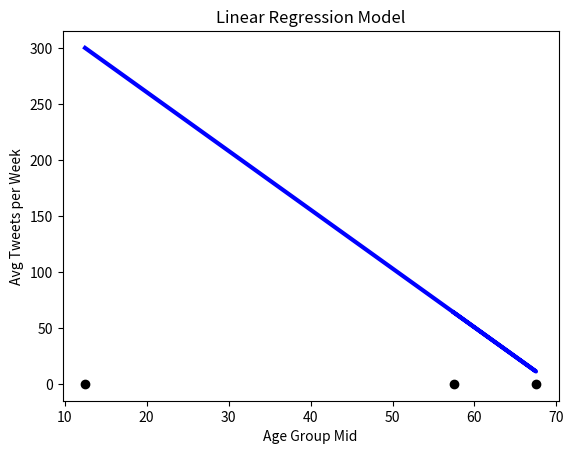

In [ ]:
# Import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age Group Mid', y='Avg Tweets per Week', data=df_grouped_no_outliers)
plt.title('Average Number of Tweets per Week by Age Group')
plt.show()

# Prepare the data for training
X = df_grouped_no_outliers[['Age Group Mid']]
y = df_grouped_no_outliers['Avg Tweets per Week']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Linear Regression Model')
plt.xlabel('Age Group Mid')
plt.ylabel('Avg Tweets per Week')
plt.show()

The model performance for the training set
-------------------------------------------
RMSE of training set is 125.90670134331238
R2 score of training set is 0.3885639573356343


The model performance for the test set
-------------------------------------------
RMSE of test set is 163.54853457893554
R2 score of test set is 0.0


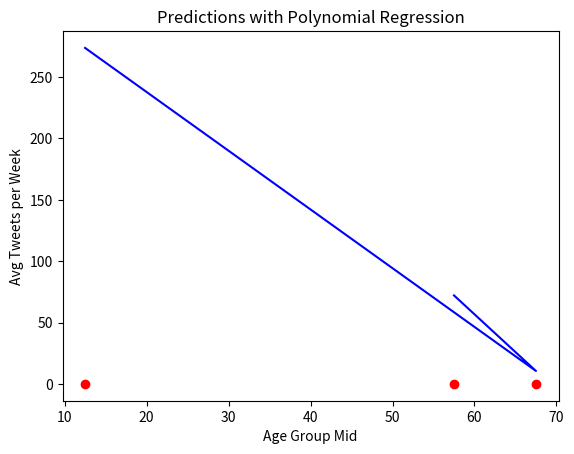

In [ ]:
# Import the necessary library
from sklearn.preprocessing import PolynomialFeatures

# Create a PolynomialFeatures object with degree 2
poly_features = PolynomialFeatures(degree=2)

# Transform the features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

# Fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)

# Predicting on test data-set
y_test_predict = poly_model.predict(X_test_poly)

# Evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)

# Evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2_test = r2_score(y_test, y_test_predict)

print('The model performance for the training set')
print('-------------------------------------------')
print('RMSE of training set is {}'.format(rmse_train))
print('R2 score of training set is {}'.format(r2_train))

print('\n')

print('The model performance for the test set')
print('-------------------------------------------')
print('RMSE of test set is {}'.format(rmse_test))
print('R2 score of test set is {}'.format(r2_test))

# Visualising the Polynomial Regression results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_test_predict, color = 'blue')
plt.title('Predictions with Polynomial Regression')
plt.xlabel('Age Group Mid')
plt.ylabel('Avg Tweets per Week')
plt.show()